## Analisis exploratorio de un supermarket

Se realiza este EDA con la intención de conocer el comportamiento de las ventas de este supermarket y poder generar algo de información que oriente a los gerentes en la toma de desiciónes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supermarket = pd.read_csv(r"C:\Users\eduar\Downloads\supermarket_sales.csv")

In [3]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
supermarket['Date'] = pd.to_datetime(supermarket['Date'])
supermarket.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [6]:
supermarket['Mes'] = supermarket['Date'].dt.month
supermarket['Anio'] = supermarket['Date'].dt.year
supermarket['Dia-semana'] = supermarket['Date'].dt.day_name()

In [7]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Mes,Anio,Dia-semana
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,Friday


In [8]:
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Mes,Anio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270,1.993000,2019.0
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000,3.000000,2019.0
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,0.835254,0.0


In [9]:
supermarket['Date'].max()

Timestamp('2019-03-30 00:00:00')

In [10]:
supermarket['Time'].describe()

count      1000
unique      506
top       19:48
freq          7
Name: Time, dtype: object

In [11]:
supermarket['Time'].min()

'10:00'

In [12]:
supermarket['Time'].max()

'20:59'

In [13]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

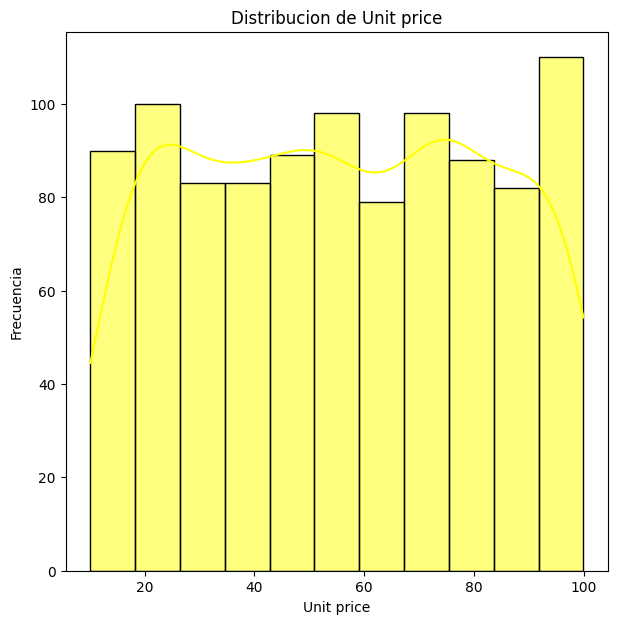

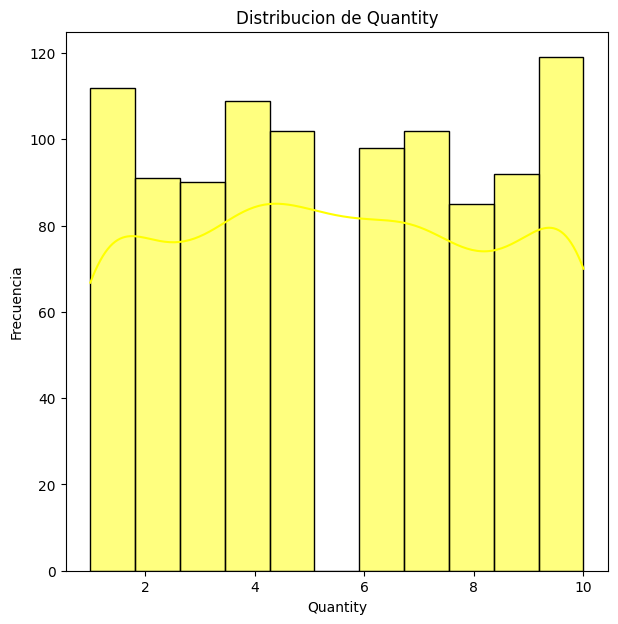

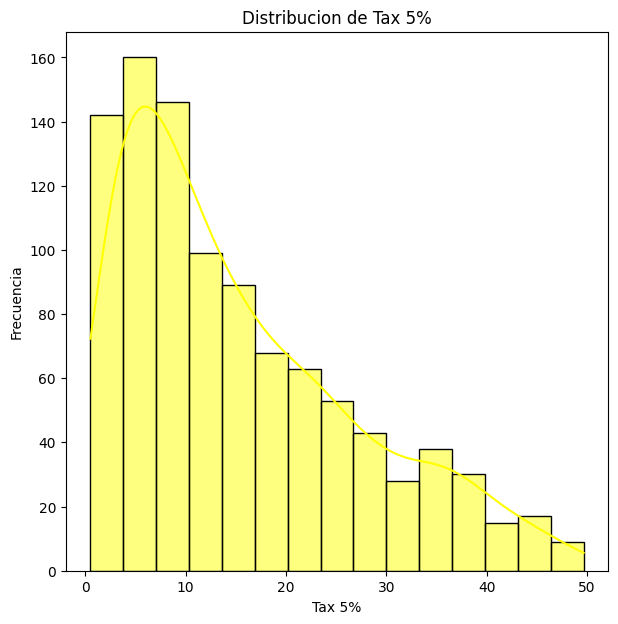

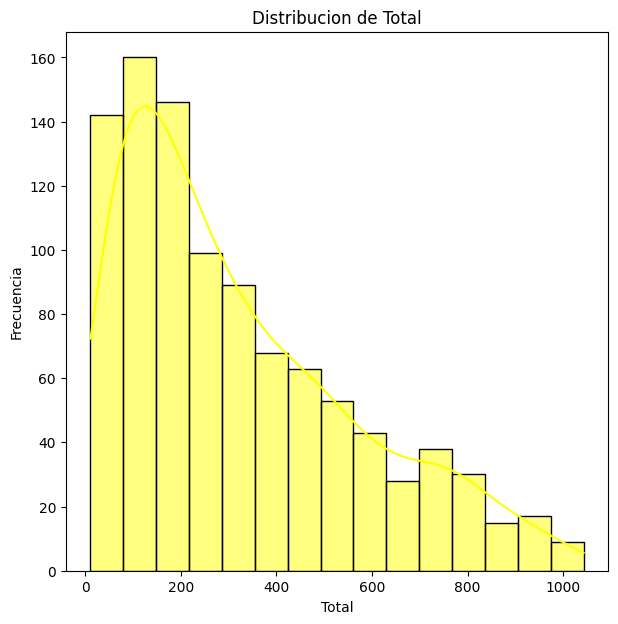

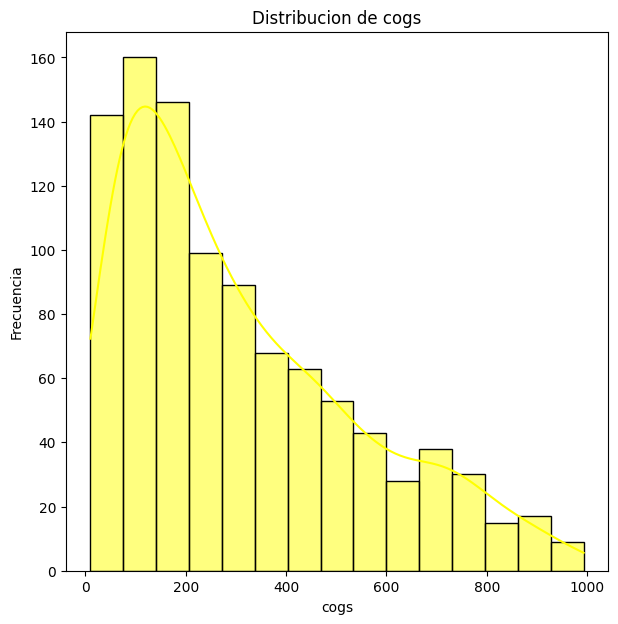

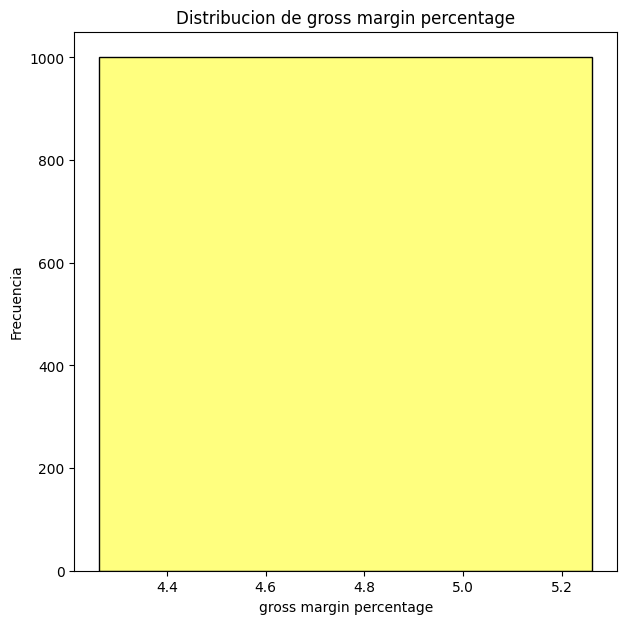

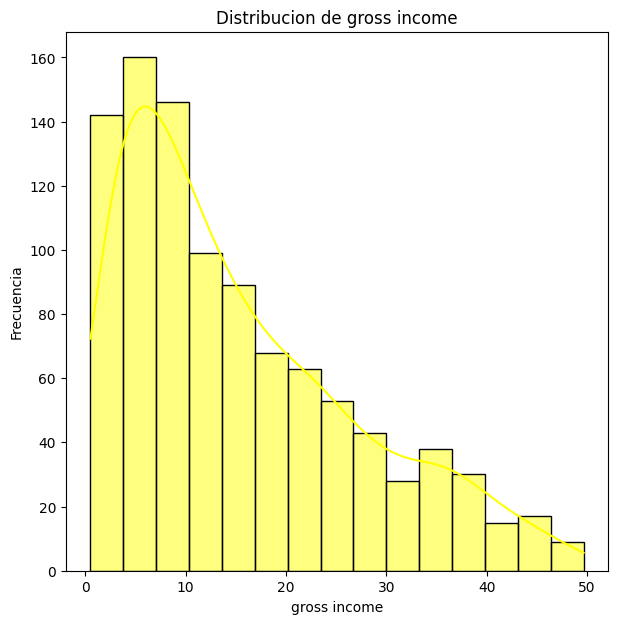

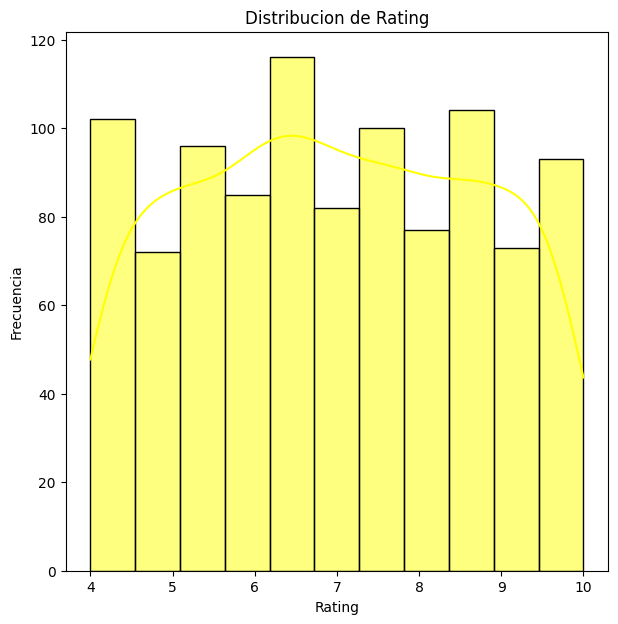

In [14]:
columnas = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

for col in columnas:
    plt.figure(figsize=(7,7))
    sns.histplot(data=supermarket[col], kde= True, color='yellow')
    plt.title(f'Distribucion de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [15]:
supermarket['Quantity'].value_counts()

Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

In [16]:
supermarket['Mes'].value_counts()

Mes
1    352
3    345
2    303
Name: count, dtype: int64

In [17]:
payment_total = supermarket.groupby('Payment')['Total'].sum().reset_index()
payment_total

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


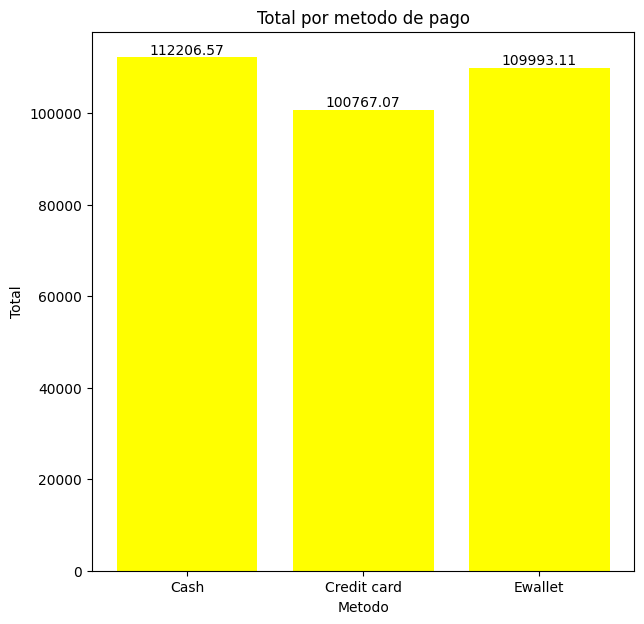

In [18]:
plt.figure(figsize=(7,7))
plt.bar(payment_total['Payment'], payment_total['Total'], color = 'yellow')

for i, value in enumerate(round(payment_total['Total'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Total por metodo de pago')
plt.xlabel('Metodo')
plt.ylabel('Total')
plt.show()

In [19]:
supermarket['Total'].sum()

np.float64(322966.749)

In [20]:
product_quantity = supermarket.groupby('Product line')['Quantity'].sum().reset_index()
product_quantity

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


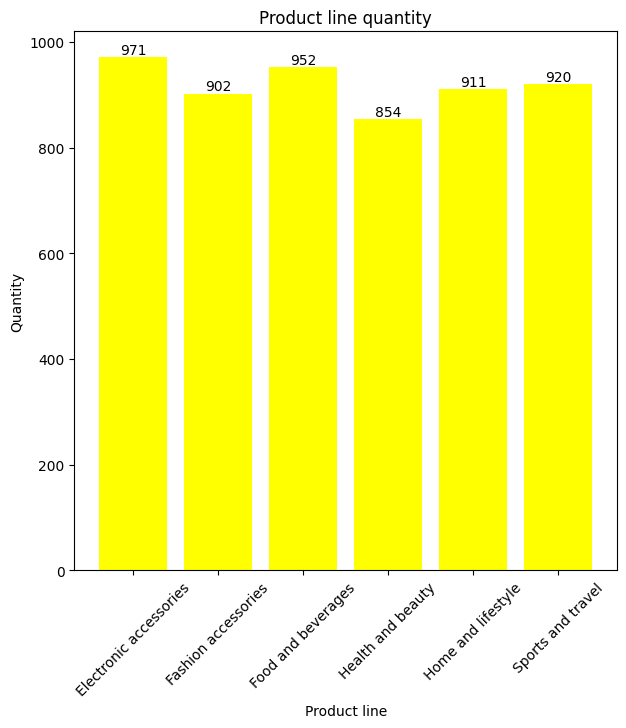

In [21]:
plt.figure(figsize=(7,7))
plt.bar(product_quantity['Product line'], product_quantity['Quantity'], color = 'yellow')

for i, value in enumerate(round(product_quantity['Quantity'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Product line quantity')
plt.xticks(rotation = 45)
plt.xlabel('Product line')
plt.ylabel('Quantity')
plt.show()

In [22]:
product_line_total = supermarket.groupby('Product line')['Total'].sum().reset_index()
product_line_total

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


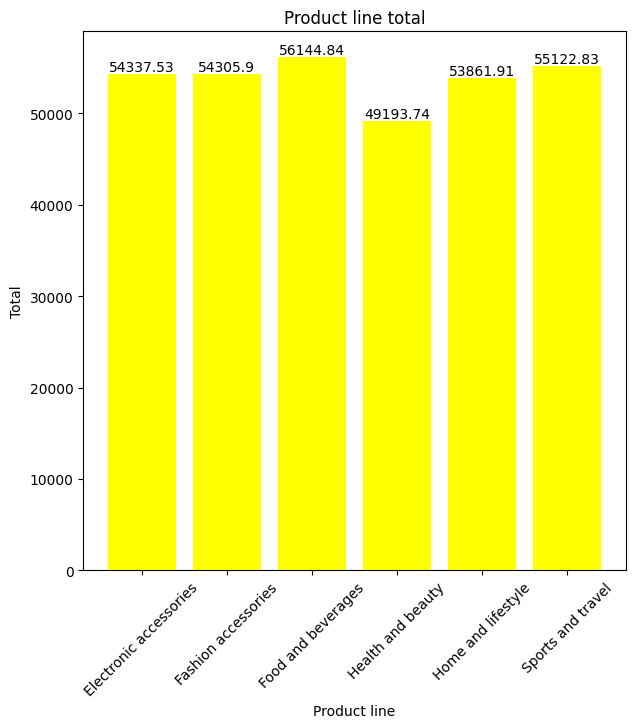

In [23]:
plt.figure(figsize=(7,7))
plt.bar(product_line_total['Product line'], product_line_total['Total'], color = 'yellow')

for i, value in enumerate(round(product_line_total['Total'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Product line total')
plt.xticks(rotation = 45)
plt.xlabel('Product line')
plt.ylabel('Total')
plt.show()

In [24]:
supermarket['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [25]:
payment_sum = supermarket.groupby('Payment')['Total'].sum().reset_index()
payment_sum

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


In [26]:
payment_data = supermarket['Payment'].value_counts().reset_index()
payment_data

,Payment,count
0,Ewallet,345
1,Cash,344
2,Credit card,311


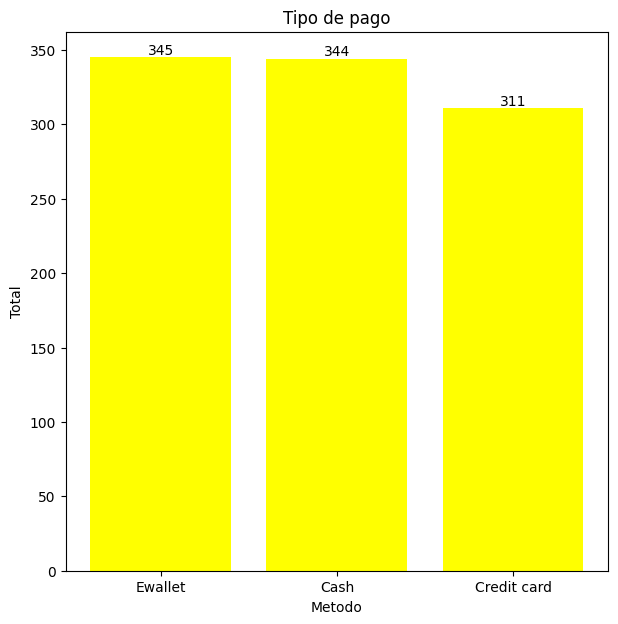

In [27]:
plt.figure(figsize=(7,7))
plt.bar(payment_data['Payment'], payment_data['count'], color = 'yellow')

for i, value in enumerate(payment_data['count']):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Tipo de pago')
plt.xlabel('Metodo')
plt.ylabel('Total')
plt.show()

In [28]:
dia_semana_total = supermarket.groupby('Dia-semana')['Total'].sum().reset_index().sort_values(by= 'Total')
dia_semana_total

,Dia-semana,Total
1,Monday,37899.0780
6,Wednesday,43731.1350
0,Friday,43926.3405
3,Sunday,44457.8925
4,Thursday,45349.2480
5,Tuesday,51482.2455
2,Saturday,56120.8095


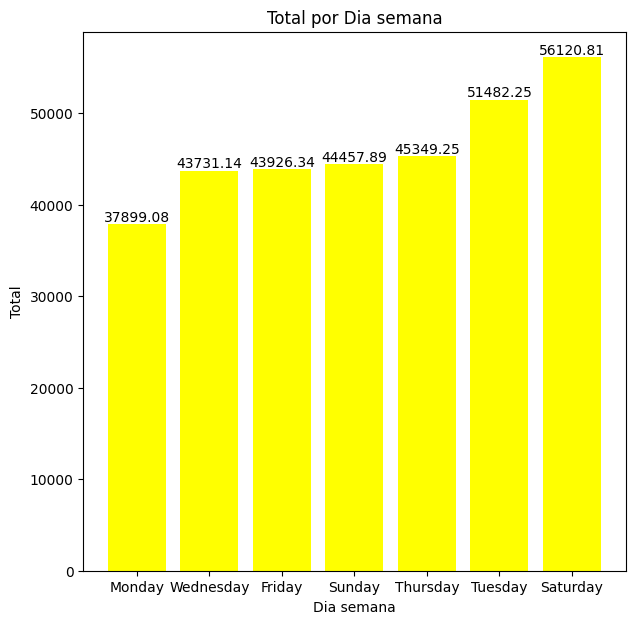

In [29]:
plt.figure(figsize=(7,7))
plt.bar(dia_semana_total['Dia-semana'], dia_semana_total['Total'], color = 'yellow')

for i, value in enumerate(round(dia_semana_total['Total'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Total por Dia semana')
plt.xlabel('Dia semana')
plt.ylabel('Total')
plt.show()

In [30]:
supermarket.groupby('City')['Total'].sum().reset_index().sort_values(by= 'Total', ascending=False)

,City,Total
1,Naypyitaw,110568.7065
2,Yangon,106200.3705
0,Mandalay,106197.6720


In [31]:
supermarket['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

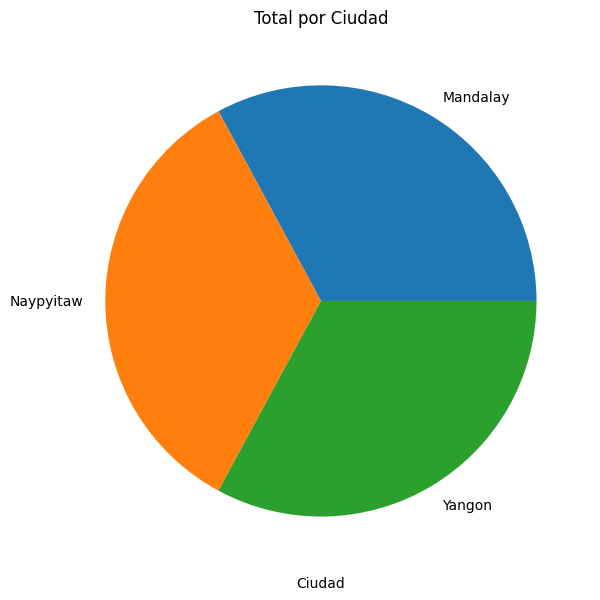

In [32]:
plt.figure(figsize=(7,7))
supermarket.groupby('City')['Total'].sum().plot(kind='pie')
plt.title('Total por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel(' ')  
plt.show() 

In [33]:
bins = ['09:59', '13:00', '16:00', '19:00', '20:59']
labels = ['10:00-13:00', '13:01-16:00', '16:01-19:00', '19:01-20:59']

# Dividir la columna en intervalos
supermarket['intervalos_time'] = pd.cut(supermarket['Time'], bins=bins, labels=labels)

In [34]:
supermarket['Time'].min()

'10:00'

In [35]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [36]:
horario_ventas = supermarket.groupby('intervalos_time')['Total'].sum().reset_index().sort_values(by=['Total'], ascending=False)
horario_ventas

C:\Users\eduar\AppData\Local\Temp\ipykernel_35276\2980673360.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horario_ventas = supermarket.groupby('intervalos_time')['Total'].sum().reset_index().sort_values(by=['Total'], ascending=False)


,intervalos_time,Total
1,13:01-16:00,94408.3245
0,10:00-13:00,90187.5030
2,16:01-19:00,76495.5975
3,19:01-20:59,61875.3240


In [37]:
for intervalo in horario_ventas['Total']:
    porcentaje = (intervalo / horario_ventas['Total'].sum()) * 100
    print(f'El porcentaje respecto del intervalo al total es {round(porcentaje, 2)}%')

El porcentaje respecto del intervalo al total es 29.23%
El porcentaje respecto del intervalo al total es 27.92%
El porcentaje respecto del intervalo al total es 23.69%
El porcentaje respecto del intervalo al total es 19.16%


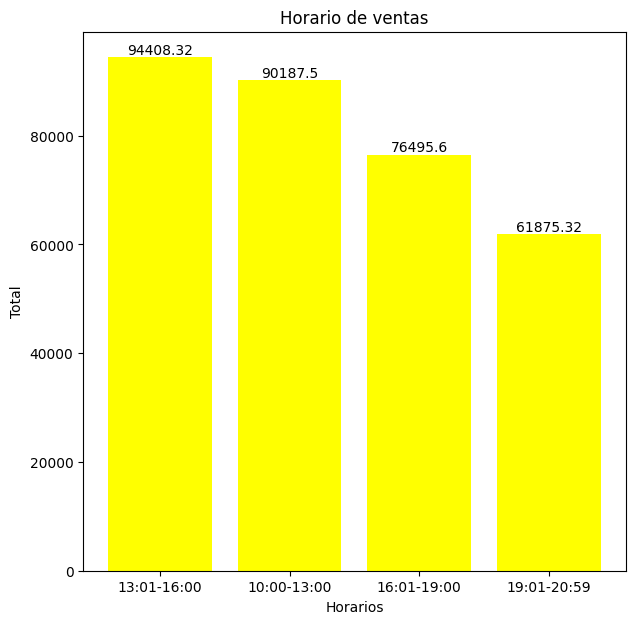

In [38]:
plt.figure(figsize=(7,7))
plt.bar(horario_ventas['intervalos_time'], horario_ventas['Total'], color = 'yellow')

for i, value in enumerate(round(horario_ventas['Total'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Horario de ventas')
plt.xlabel('Horarios')
plt.ylabel('Total')
plt.show()

In [39]:
supermarket['Time'].value_counts()

Time
19:48    7
14:42    7
17:38    6
17:36    5
19:39    5
        ..
16:27    1
15:23    1
18:18    1
15:17    1
19:12    1
Name: count, Length: 506, dtype: int64

In [40]:
total_customer_type = supermarket.groupby('Customer type')['Total'].sum().reset_index()
total_customer_type

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


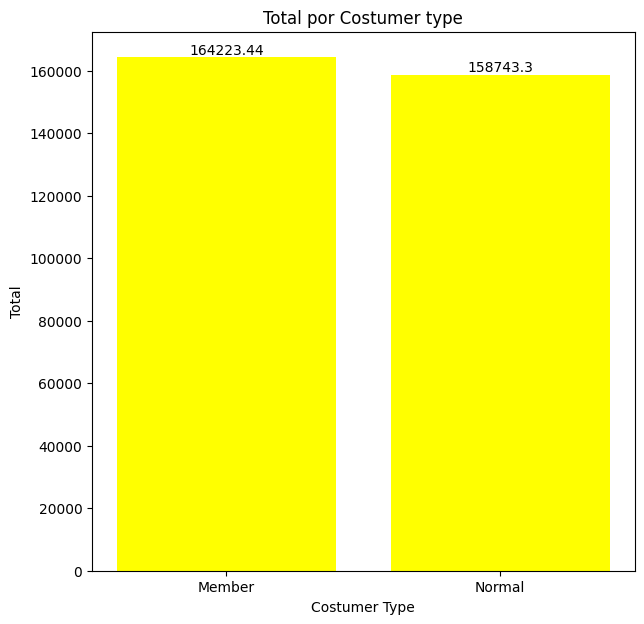

In [41]:
plt.figure(figsize=(7,7))
plt.bar(total_customer_type['Customer type'], total_customer_type['Total'], color = 'yellow')

for i, value in enumerate(round(total_customer_type['Total'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Total por Costumer type')
plt.xlabel('Costumer Type')
plt.ylabel('Total')
plt.show()

In [42]:
total_gender = supermarket.groupby('Gender')['Total'].sum().reset_index()
total_gender

,Gender,Total
0,Female,167882.925
1,Male,155083.824


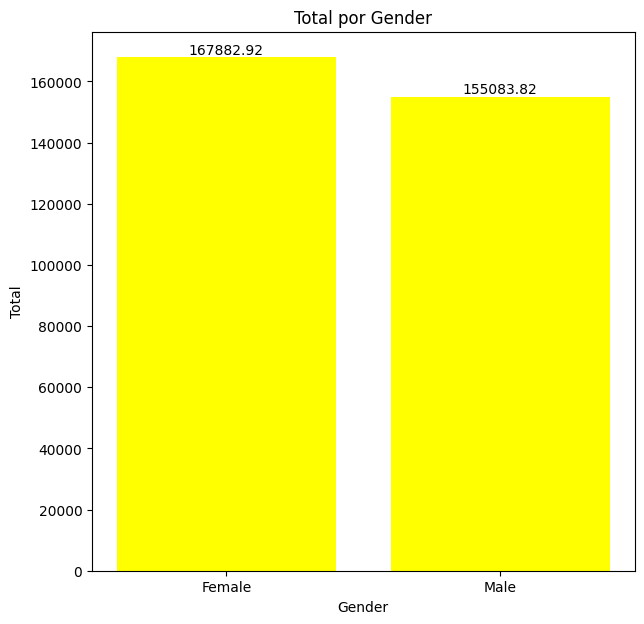

In [43]:
plt.figure(figsize=(7,7))
plt.bar(total_gender['Gender'], total_gender['Total'], color = 'yellow')

for i, value in enumerate(round(total_gender['Total'], 2)):
     plt.text(i, value, str(value), ha='center', va='bottom')
     
plt.title('Total por Gender')
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

### Conclusiónes

- Vemos que el dataset solo incluye datos de Enero a Marzo de 2019
- El horario de atención es de 10:00 a 20:59
- Notamos un pequeña reduccion de operaciones de Enero a Marzo
- Los precios por unidad tiene una distribucion bastante uniforme con un leve sesgo a precios de mas de 90
- La mayor parte de las compras son de __1__ o __10__ articulos y las menos con __8__
- Tax, Total y cogs tienen grandes sesgos hacia la izquierda
- La mayor parte de las ventas tiene un ticket no mayor a __200__, tan solo 10 tickets llegan a los __1000__
- El rating tiene una distribucion muy uniforme con un pico en __6.5__
- El metodo de pago que mas facturo es __cash__ y el que menos __credit card__
- El metodo de pago favorito es __ewallet__ y el menos __credit card__
- Notamos que _credit card_ tiene poco uso, podriamos ofrecer un credito departamental
- Los productos de mayor venta son __Electronic accesories__ y los de menor __Health and beauty__
- La linea de producto que mas factura es __Food and beverages__ y la que menos __Health and beauty__
- Los dias de mayor venta son los __sabados__ seguidos de los __jueves__ y los de menor los __lunes__
- Vemos que la ciudad __Naypyitaw__ es la que menos transacciones realizo pero es la que mas facturo
- Vemos que el horario de mayor ventas es de __13:01 a 16:00__ y el de menor de __19:01 a 20:59__
- La mayor cantidad la facturar los clientes que son __miembros__ pero no de una manera tan significativa 
- Las __mujeres__ facturan mas que los hombres a pesar de solo haber realizado 2 transacciones mas
- Las __mujeres__ no estan comprando suficiente __Health and beauty__ 
